In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import json
import torch
import yaml
import numpy as np
import cv2
import copy
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

In [3]:
DATA_PATH = "/workspace/plane-nerf/data/jackal_floor_evaluation_data"
MODEL_PATH = "/workspace/plane-nerf/data/jackal_floor_training_data_1/yolo/runs/segment/model_2024-03-11_13-52-23"

if not os.path.exists(DATA_PATH + "/masks"):
    os.makedirs(DATA_PATH + "/masks")

with open(f"{DATA_PATH}/transforms.json", "r") as f:
    transforms = json.load(f)

model = YOLO(MODEL_PATH+"/weights/best.pt")


0: 384x640 1 jackal, 68.5ms
Speed: 5.1ms preprocess, 68.5ms inference, 72.8ms postprocess per image at shape (1, 3, 384, 640)


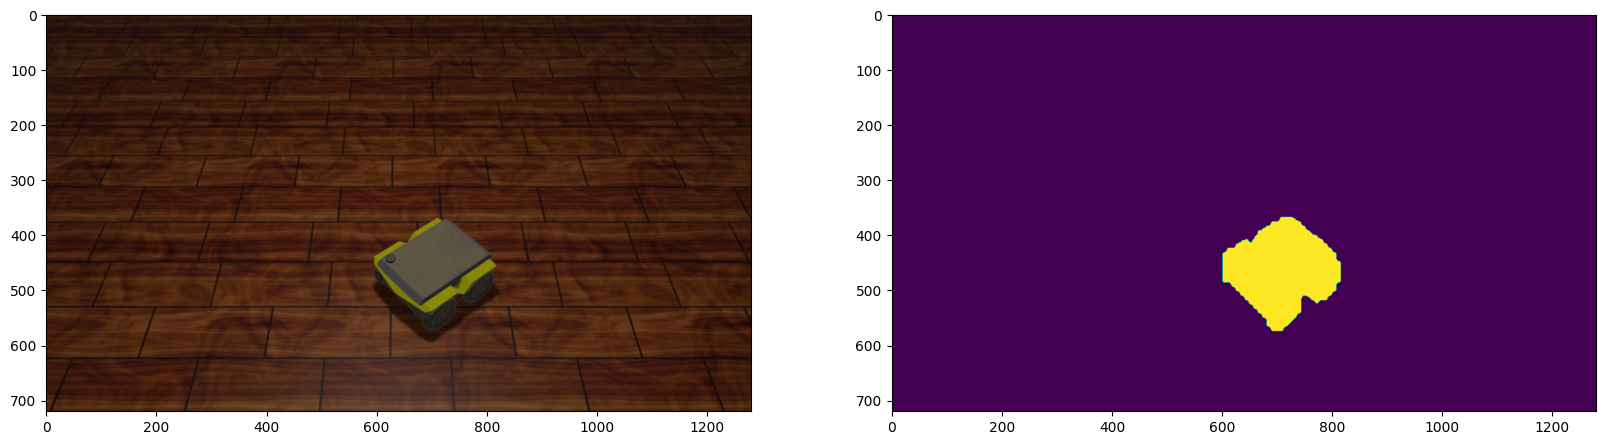

In [4]:
new_frames = []

for i in range(len(transforms["frames"])):
    f = transforms["frames"][i].copy()

    img_path = os.path.join(DATA_PATH, f["file_path"])
    img = Image.open(img_path)
    
    # Inference
    results = model([img_path])
    #Get Best mask
    best_mask = results[0].masks.xy[0]
    # Draw mask using coordinates in best_mask
    best_mask = np.array(best_mask)
    best_mask = best_mask.reshape(-1, 2).astype(np.int32)
    mask = np.zeros((img.size[1], img.size[0]), dtype=np.uint8)
    cv2.fillPoly(mask, [best_mask], 255)

    #Save mask as single channel
    f["mask_path"] = f"masks/{i}.png"
    mask_path = os.path.join(DATA_PATH, f["mask_path"])
    mask = Image.fromarray(mask)
    mask.save(mask_path)

    # Plot
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].imshow(img)
    ax[1].imshow(mask)

    break  